# Adedeji ESAN Project: Supervised Learning - Personal Loan Campaign Modelling

# Dataset:
Bank_Personal_Loan_Modelling

# Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans

# 1. Load Libraries and data and check datatype, statistical summary, shape, null values or incorrect imputation

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [244]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [245]:
#Load data
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# read_csv is used to read csv files

In [246]:
#Print header of the file
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [247]:
loan_df.dtypes
# gives number of rows and columns

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [248]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [249]:
loan_df.shape

(5000, 14)

In [250]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings 
#Number of unique in each column?
#Number of people with zero mortgage?
#Number of people with zero credit card spending per month?
#Value counts of all categorical columns
#Univariate and Bivariate
#Get data model ready

In [253]:
loan_df['ID'].unique()

array([   1,    2,    3, ..., 4998, 4999, 5000], dtype=int64)

In [254]:
loan_df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [255]:
loan_df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [256]:
loan_df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [257]:
loan_df['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [258]:
loan_df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

In [259]:
loan_df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [260]:
loan_df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [261]:
loan_df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [262]:
loan_df['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [263]:
loan_df['CD Account'].unique()

array([0, 1], dtype=int64)

In [264]:
loan_df['Securities Account'].unique()

array([1, 0], dtype=int64)

In [265]:
loan_df['Online'].unique()

array([0, 1], dtype=int64)

In [266]:
loan_df['CreditCard'].unique()

array([0, 1], dtype=int64)

In [267]:
#Number of people with zero mortgage

TotalNumOfPeople= loan_df['Mortgage'].count()
TotalNumOfPeopleWithMortgage= np.count_nonzero(loan_df['Mortgage'])

TotalNumOfPeopleWithOUTMortgage = TotalNumOfPeople - TotalNumOfPeopleWithMortgage

print ('Total Number of people with Zero Mortage is;', TotalNumOfPeopleWithOUTMortgage)

Total Number of people with Zero Mortage is; 3462


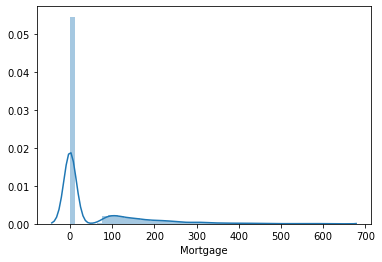

In [268]:
sns.distplot(loan_df['Mortgage']);

In [269]:
#Number of people with zero credit card spending per month
TotalNumOfPeople= loan_df['CreditCard'].count()
TotalNumOfPeopleWithCCSpend= np.count_nonzero(loan_df['CreditCard'])

TotalNumOfPeopleWithOUTCCSpend = TotalNumOfPeople - TotalNumOfPeopleWithCCSpend

print ("Number of people with zero credit card spending per month is;", TotalNumOfPeopleWithOUTCCSpend)

Number of people with zero credit card spending per month is; 3530


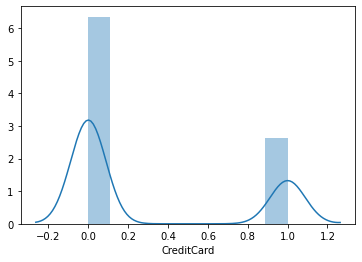

In [270]:
sns.distplot(loan_df['CreditCard']);

# Value counts of all categorical columns
The Categorical columns are 'Education','Family','Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'

In [271]:
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [272]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [293]:
loanCat_df = ['Education','Family']

loan_df[loanCat_df].apply(lambda x: x.value_counts())

,Education,Family
1,"2,096.00",1472
2,"1,403.00",1296
3,"1,501.00",1010
4,nan,1222


In [294]:
loanCat2_df = ['Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

loan_df[loanCat2_df].apply(lambda x: x.value_counts())

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4520,4478,4698,2016,3530
1,480,522,302,2984,1470


# Univariate and Bivariate

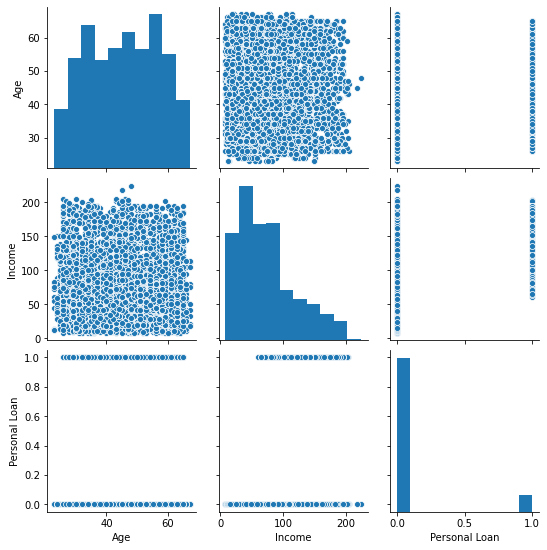

In [274]:
sns.pairplot(loan_df[['Age', 'Income', 'Personal Loan']]);

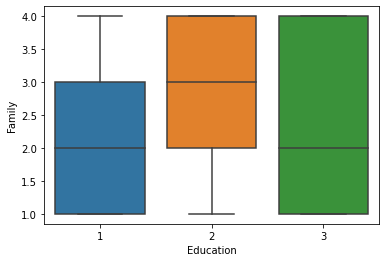

In [275]:
sns.boxplot(loan_df['Education'], loan_df['Family']);

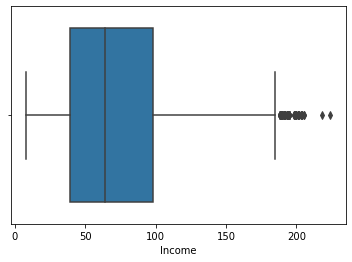

In [276]:
sns.boxplot(loan_df['Income']);

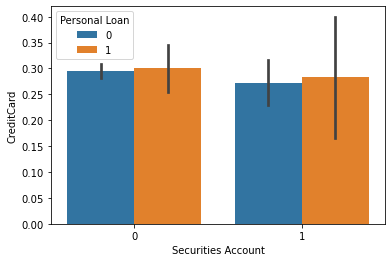

In [277]:
sns.barplot(loan_df['Securities Account'], loan_df['CreditCard'], hue=loan_df['Personal Loan']);

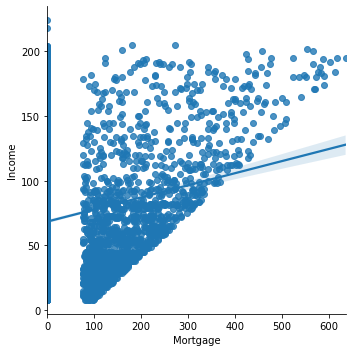

In [279]:
sns.lmplot(y="Income", x="Mortgage", data=loan_df);

In [280]:
loan_df1 = loan_df.copy()
df2 = loan_df1.drop (['ID','ZIP Code'], axis=1)
df2.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.00,-0.00,-0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02
CD Account,0.01,0.01,0.17,0.01,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


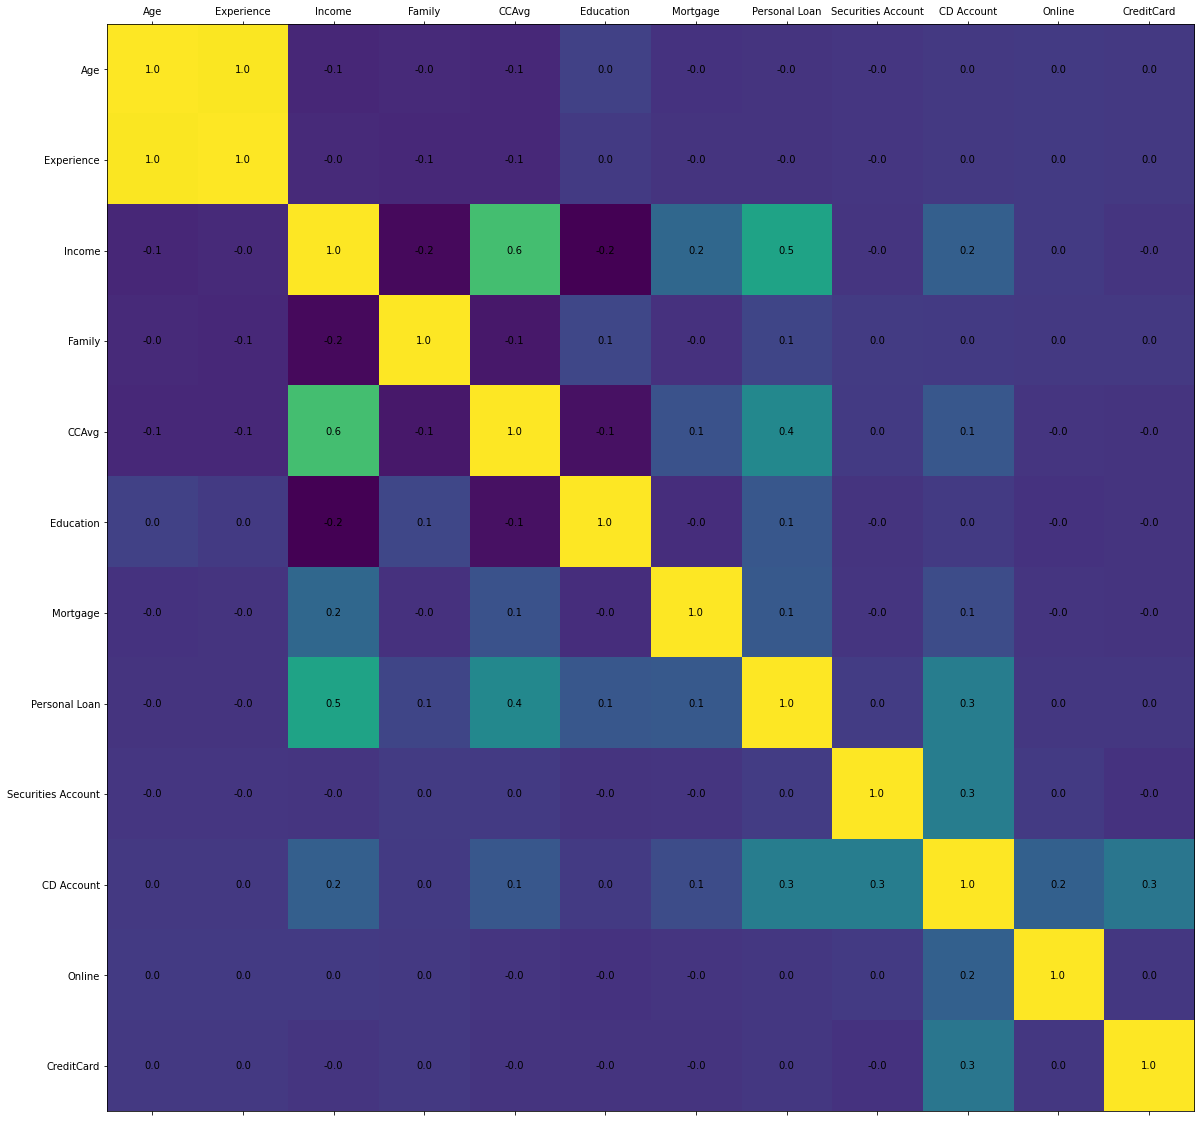

In [281]:
# To see correlation in graphical representation
def plot_corr(df2, size=11):
    corr = df2.corr()
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
        
plot_corr(df2)

# 3. Split the data into training and test set in the ratio of 70:30 respectively 


In [282]:
#separating dependent and independent variables

from sklearn.model_selection import train_test_split

X = df2.drop('Personal Loan',axis=1)     # Predictor feature columns 
Y = df2['Personal Loan']   # Predicted class (1=True, 0=False) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) 


x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2573,58,34,80,2,1.60,1,0,0,0,1,1
2066,41,16,30,2,1.40,2,0,0,0,0,1
2823,33,7,21,1,0.60,3,0,1,0,0,0
2389,27,1,41,1,1.90,3,0,0,0,0,1
2702,42,18,144,2,6.10,1,158,0,0,0,0


In [283]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [284]:
print("Original Personal Loan Customer True Values    : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal Loan'] == 1]), (len(df2.loc[df2['Personal Loan'] == 1])/len(df2.index)) * 100))
print("Original Personal Loan Customer  False Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal Loan'] == 0]), (len(df2.loc[df2['Personal Loan'] == 0])/len(df2.index)) * 100))
print("")
print("Training Personal Loan Customer  True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan Customer False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan Customer  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan Customer  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan Customer True Values    : 480 (9.60%)
Original Personal Loan Customer  False Values   : 4520 (90.40%)

Training Personal Loan Customer  True Values    : 340 (9.71%)
Training Personal Loan Customer False Values   : 3160 (90.29%)

Test Personal Loan Customer  True Values        : 140 (9.33%)
Test Personal Loan Customer  False Values       : 1360 (90.67%)



# 4. Use Logistic Regression model to predict the number of customers buying personal loans.
Print all the metrics related for evaluating the model performance 

In [285]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 7 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.133198
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.584      
Dependent Variable:   Personal Loan    AIC:              956.3869   
Date:                 2020-07-02 12:31 BIC:              1030.3131  
No. Observations:     3500             Log-Likelihood:   -466.19    
Df Model:             11               LL-Null:          -1120.1    
Df Residuals:         3488             LLR p-value:      9.1517e-274
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       9.0000                                        
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -11.9975   1.9104 -6.2801 0.0000 -15.7419 -8.2532
Age                 -0.0586   0.0715 -0.8197 0.4124  -0.1988  0.0816
Experience           0.0705   0.0712  0.9892 0.3226  -0.0691  0.2101
Income               0.0517   0.0030 17.1931 0.0000   0.0458  0.0576
Family               0.7745   0.0879  8.8146 0.0000   0.6023  0.9467
CCAvg                0.1619   0.0471  3.4413 0.0006   0.0697  0.2541
Education            1.6910   0.1323 12.7787 0.0000   1.4317  1.9504
Mortgage             0.0006   0.0006  1.0121 0.3115  -0.0006  0.0019
Securities Account  -0.8265   0.3374 -2.4494 0.0143  -1.4879 -0.1651
CD Account           3.6744   0.3899  9.4247 0.0000   2.9103  4.4385
Online              -0.5960   0.1837 -3.2451 0.0012  -0.9560 -0.2360
CreditCard          -1.1803   0.2383 -4.9538 0.0000  -1.6473 -0.7133
====================================================================

"""

In [305]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

      0    1    2     3    4     5     6     7     8     9   10  intercept
0 -0.06 0.06 0.00 -0.04 0.04 -0.13 -0.00 -0.11 -0.07 -0.13 0.12      -0.47


#  Test accuracy calculation

In [286]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
3406,0,0.00,0
757,0,0.02,0
3624,0,0.02,0
4544,0,0.00,0
3235,0,0.01,0


# Build a confusion matrix

In [288]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

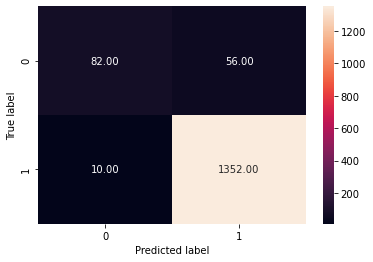

In [289]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [306]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Total Precision : ',np.round( precision_score( y_test, y_pred_df.predicted ), 2 ) )
print( 'Total Recall : ',np.round( recall_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.96
Total Precision :  0.89
Total Recall :  0.59


# Predicted Probability distribution Plots for Customer NOT buying loans and Customer buying loans

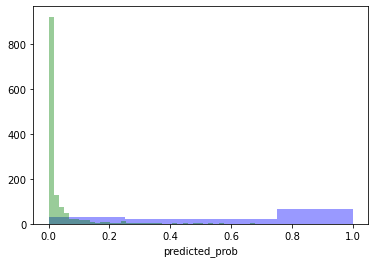

In [296]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )
plt.show()

# 5. Give your reasoning on how can the model perform better? 
Hint: Check parameter

The classification goal is to predict the likelihood of a liability customer buying personal loans

The model gives a classification rate of 96%, which is considered as very good accuracy.

Furthermore, the Precision metric of the model shows how accurate the model is, that is, when the model makes a prediction of how often it is correct. In this model prediction case, the Logistic Regression model predicted customers NOT accessing personal loans as 89% of the time.

Additionally and from the Logistic Regression model, Recall metric of customer NOT accessing personal loans in the test set was identified as 59% of the time.

The thershold used in the model is >0.6 as values at and above 0.7 probability is converted to '1' and converted values which are 0.6 and below as '0'. Hence, to improve the model we may choose to increase the probability rates to >0.8. This will also give more opportunities to improve the Truth Positive Rate (TPR) by minimizing the False Negative (FN) predictions further.

# 6. Give Business understanding of your model?

The Performance analysis shows that less people are buying loans with a prediction accuracy of 96% and other metrics also performing to a degree of satisfaction. The recall value can be further improved with higher sensitivity through higher probability thresold index.

Additionally, the thershold used in the model is >0.6 hence if the bank wants to make the probability of non-default on loan purchase by customer to be higher, this will give more confidence and reduce the risk of defaults.

Finally, key adivse for the bank in question is to create more incentives around people with higher income to be able to generate more personal loans. The classification goal was able to predict the likelihood of a liability customer buying personal loans effectively.

